# Problem Set #7

# MACS 30150, Dr. Evans

## Submitted by - Nipun Thakurele

## Question 1

In [219]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [220]:
url = ('https://raw.githubusercontent.com/UC-MACSS/persp-model-econ_W19/' +
    'master/ProblemSets/PS7/data/strongdrink.txt')
strong_drink = pd.read_csv(url)
strong_drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Part (a)

In [221]:
import warnings
warnings.filterwarnings("ignore")

# Separate the data into a training set and test set 

X = strong_drink[[ 'alco', 'malic', 'tot_phen', 'color_int']]
y = strong_drink[['cultivar']]

# This function train_test_split is from sklearn.cross_validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state=20)

LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
LogReg.fit(X_train, y_train)
print("intercepts : ", LogReg.intercept_)
print("coefficients : ", LogReg.coef_)

intercepts :  [-24.01133153  22.80168036   1.20965116]
coefficients :  [[ 1.70043264 -0.26560971  1.22389447  0.02274778]
 [-1.46798523 -0.33305092  0.66400603 -0.92270882]
 [-0.2324475   0.59866064 -1.8879004   0.89996106]]


The estimated intercepts and coefficients for j = 1 are :
    -24.011, 1.70043264, -0.26560971,  1.22389447 and 0.02274778, respectively.

The estimated intercepts and coefficients for j = 2 are : 
    22.801, -1.46798523, -0.33305092,  0.66400603 and -0.92270882, respectively.

In [222]:
y_pred = LogReg.predict(X_test)

In [223]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44



The error rate for cultivar 1: 1 - 0.87 = 0.13

The error rate for cultivar 2: 1 - 1 = 0

The error rate for cultivar 3: 1 - 1 = 0

cultivar 2 and 3 have the lowest error rate of 0, however, cultivar 3 has a higher measure of recall and
f1-score than cutlivar 2. Hence, cultivar 3 is the most accurately predicted category.
Note: Though cultivar 3 is the most accurately predicted category, it's not the one with most number of observations.

In [224]:
test_MSE = mean_squared_error(y_test, y_pred)
print("test_MSE is : ", test_MSE)

test_MSE is :  0.045454545454545456


MSE from the test set is 0.04546

## Part (b)

In [225]:
Xvars = X.values
yvals = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_tests = np.zeros(N_loo)
y_preds = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    y_tests[test_index] = y_test
    LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_preds[test_index] = y_pred
    MSE_vec[test_index] = (y_test - y_pred) ** 2

MSE = MSE_vec.mean()
MSE_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE,
      ', test estimate MSE standard err=', MSE_std)

test estimate MSE loocv= 0.09659090909090909 , test estimate MSE standard err= 0.39426250589387657


In [226]:
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

         1.0       0.90      0.93      0.92        59
         2.0       0.91      0.90      0.91        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.92      0.92      0.92       176
   macro avg       0.92      0.92      0.92       176
weighted avg       0.92      0.92      0.92       176



The error rates for LOOCV for each cultivar are the following: <br>
cultivar 1: error rate = 1 - 0.90 = 0.10 <br>
cultivar 2: error rate = 1 - 0.91 = 0.09 <br>
cultivar 3: error rate = 1 - 0.96 = 0.04 <br>


The model is best at predicting cultivar 3. <br>
Cultivar 3 is the category with the least observations. 
When compared to the error rates from part a, overall, 
these error rates have only increased. <br>
The error rate did decrease for cultivar 1, 
but the error rates increased for both cultivars 1 and cultivars 2.

## Part (c)

In [227]:
import warnings
warnings.filterwarnings("ignore")

k = 4
kf = KFold(n_splits=k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    MSE_vec_kf[k_ind] = ((y_test - y_pred) ** 2).mean()
    k_ind += 1
    

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 1.18801652892562 test estimate MSE standard err= 0.1475646391377611


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       1.00      0.90      0.95        20
           3       1.00      1.00      1.00         9

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.95        44



The error rates for k-fold cross validation : <br>
Cultivar 1: error rate = 1 - 0.88 = 0.12 <br>
Cultivar 2: error rate = 1 - 1 = 0 <br>
Cultivar 3: error rate = 1 - 1 = 0 <br>
The model is best at predicting cultivar 2 and cultivar 3. <br>
These error rates are similar to the ones obtained in part a. <br>
The current error rates for cultivar 2 and 3 have decreased when compared to part b error rates. <br>

In [229]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 1.18801652892562 test estimate MSE standard err= 0.1475646391377611


# Question 2

In [230]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [231]:
url = ('https://raw.githubusercontent.com/UC-MACSS/persp-model-econ_W19/' +
    'master/ProblemSets/PS7/data/CoolIndex.txt')

cool_index = pd.read_csv(url)
cool_index.rename(columns={'1.100000000000000000e+01': 'age'}, inplace=True)
cool_index.rename(columns={'1.098160218403766208e+01': 'coolness'}, inplace=True)
cool_index.head()

,age,coolness
0,11.0,11.364925
1,11.0,10.190227
2,11.0,9.903725
3,11.0,8.997918
4,11.0,9.882644


## Part (a)

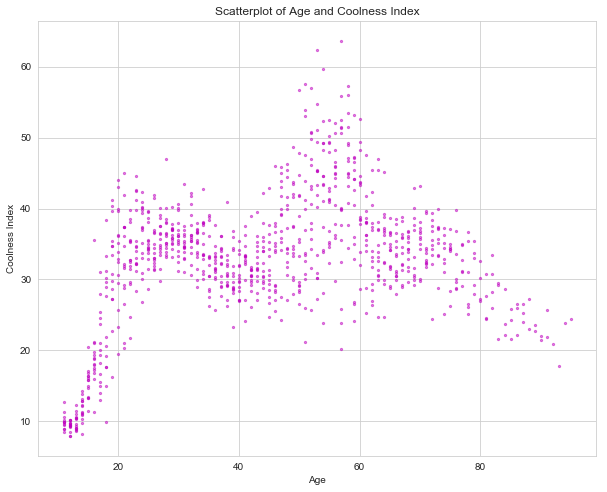

In [232]:
age = cool_index['age']
coolness = cool_index['coolness']

plt.scatter(age, coolness, s = 5, c = 'm', alpha = 0.5)
plt.xlabel(r'Age')
plt.ylabel(r'Coolness Index')
plt.title('Scatterplot of Age and Coolness Index')
plt.show()

## Part (b)

In [233]:
coolness = cool_index['coolness']
age = cool_index['age']
age_bin1 = (age < 22).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = (age >= 77).astype(int)

X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,955.000000,955.000000,955.000000,955.000000,955.000000
mean,0.161257,0.276440,0.285864,0.217801,0.058639
std,0.367960,0.447471,0.452062,0.412968,0.235070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [234]:
reg_step = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg_step_results = reg_step.fit()
print(reg_step_results.summary())
y_step_pred = reg_step_results.predict(X_step)

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     176.8
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          3.36e-113
Time:                        11:26:06   Log-Likelihood:                -3210.8
No. Observations:                 955   AIC:                             6432.
Df Residuals:                     950   BIC:                             6456.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1617      0.564     35.748      0.0

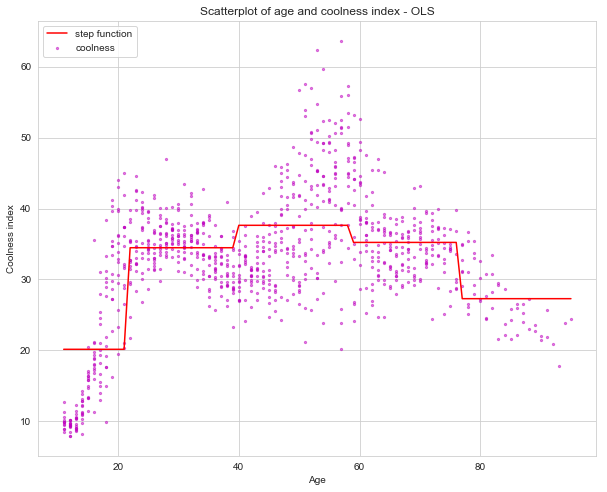

In [235]:
plt.scatter(age, coolness, s = 5, c = 'm', alpha = 0.5)
plt.plot(cool_index.age, y_step_pred, color = 'r', label='step function')
plt.xlabel(r'Age')
plt.ylabel(r'Coolness index')
plt.title('Scatterplot of age and coolness index - OLS')
plt.legend(loc='upper left')
plt.show()

In [236]:
print(reg_step_results.params)

age_bin1    20.161684
age_bin2    34.475788
age_bin3    37.635105
age_bin4    35.225400
age_bin5    27.296378
dtype: float64


Estimated step function value for: <br>
age_bin1 = 20.161684 <br>
age_bin2 = 34.475788 <br>
age_bin3 = 37.635105 <br>
age_bin4 = 35.225400 <br>
age_bin5 = 27.296378 <br>

In [237]:
print(reg_step_results.params[3])

35.22540004024275


The predicted coolness of a 73-year old is 35.23 (approx.).

## Part (c)

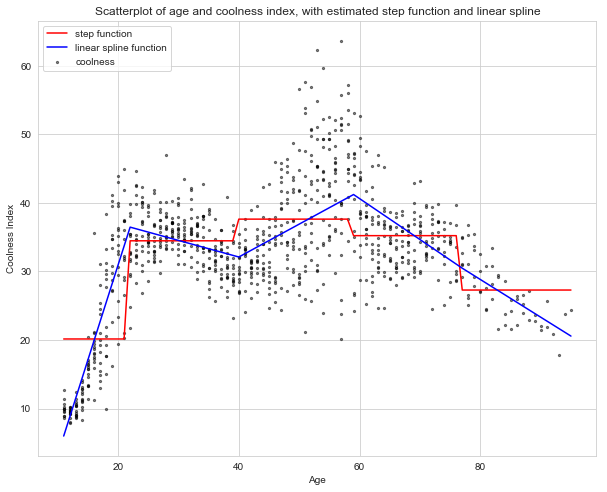

In [238]:
cool_values = cool_index.groupby('age')['coolness'].mean()
from scipy.interpolate import LSQUnivariateSpline

knots = [22, 40, 59, 77]
spl_cool = LSQUnivariateSpline(age.unique(), cool_values, knots, k=1)

plt.scatter(age, coolness, s = 5, c = 'k', alpha = 0.5)
plt.plot(CoolIndex.age, y_step_pred, color = 'r', label='step function')
plt.plot(CoolIndex.age, spl_cool(cool_index.age), 'b-', label='linear spline function')
plt.xlabel(r'Age')
plt.ylabel(r'Coolness Index')
plt.title('Scatterplot of age and coolness index, with estimated step function and linear spline')
plt.legend(loc='upper left')
plt.show()

In [239]:
age_for_predict = np.array([73])
predicted_coolness = spl_cool(age_for_predict)
print('Age=', age_for_predict)
print('predicted coolness=', predicted_coolness)

Age= [73]
predicted coolness= [32.86784965]


The predicted coolness of a 73-year old from linear spline is 32.87 (approx.).

## Part (d)

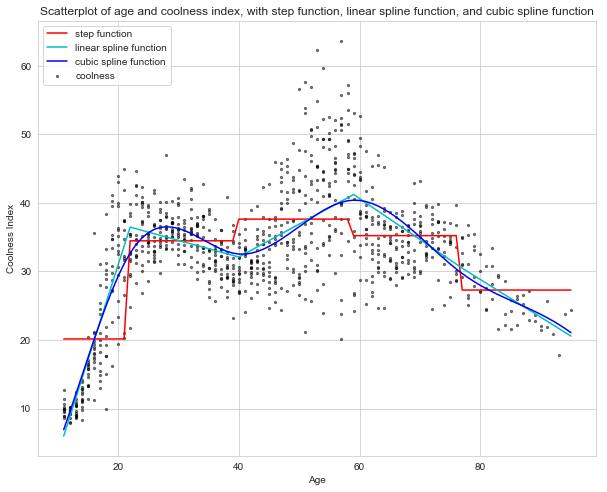

In [240]:
cool_values = cool_index.groupby('age')['coolness'].mean()
from scipy.interpolate import LSQUnivariateSpline
knots = [22, 40, 59, 77]
spl_cubic_cool = LSQUnivariateSpline(age.unique(), cool_values, knots, k=3)

plt.scatter(age, coolness, s = 5, c = 'k', alpha = 0.5)
plt.plot(cool_index.age, y_step_pred, color = 'r', label='step function')
plt.plot(cool_index.age, spl_cool(cool_index.age), 'c', label='linear spline function')
plt.plot(cool_index.age, spl_cubic_cool(cool_index.age), 'b', label='cubic spline function')
plt.xlabel(r'Age')
plt.ylabel(r'Coolness Index')
plt.title('Scatterplot of age and coolness index, with step function, linear spline function, and cubic spline function')
plt.legend(loc='upper left')
plt.show()

In [241]:
age_for_predict = np.array([73])
predicted_coolness = spl_cubic_cool(age_for_predict)
print('age=', age_for_predict)
print('predicted coolness=', predicted_coolness)

age= [73]
predicted coolness= [32.64259671]


The predicted coolness of a 73-year old from the cubic spline is 32.64 (approx.).